In [392]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [393]:
fee_train = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/Doctor_fee_consultation/Final_Train.csv", encoding = "ISO-8859-1", engine='python')
fee_train

,Qualification,Experience,Rating,Location,City,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,Kakkanad,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Whitefield,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,Mathikere - BEL,Bangalore,ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,Bannerghatta Road,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,Keelkattalai,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,Basavanagudi,Bangalore,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,Nungambakkam,Chennai,General Medicine,NaN,100
5958,MBBS,41 years experience,97%,Greater Kailash Part 2,Delhi,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,Vileparle West,Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [394]:
fee_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Location            5936 non-null   object
 4   City                5935 non-null   object
 5   Profile             5961 non-null   object
 6   Miscellaneous_Info  3341 non-null   object
 7   Fees                5961 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 372.7+ KB


In [395]:
fee_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Location                25
City                    26
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

miscellaneous column seeems to be a repetition of columns like rating, etc. Hence dropping it

In [396]:
fee_train.drop('Miscellaneous_Info', axis = 1, inplace = True)
fee_train

,Qualification,Experience,Rating,Location,City,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,Kakkanad,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Whitefield,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,Mathikere - BEL,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,Bannerghatta Road,Bangalore,Ayurveda,250
4,BAMS,20 years experience,100%,Keelkattalai,Chennai,Ayurveda,250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,Basavanagudi,Bangalore,ENT Specialist,300
5957,MBBS,33 years experience,NaN,Nungambakkam,Chennai,General Medicine,100
5958,MBBS,41 years experience,97%,Greater Kailash Part 2,Delhi,General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,Vileparle West,Mumbai,General Medicine,100


Let's convert Rating into integrer and replace blanks with 0%

In [397]:
fee_train['Rating'].fillna('0%',inplace = True)
fee_train['Rating'] = fee_train['Rating'].str.slice(stop=-1).astype(int)

In [398]:
fee_train

,Qualification,Experience,Rating,Location,City,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,Kakkanad,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,Whitefield,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,Mathikere - BEL,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,0,Bannerghatta Road,Bangalore,Ayurveda,250
4,BAMS,20 years experience,100,Keelkattalai,Chennai,Ayurveda,250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98,Basavanagudi,Bangalore,ENT Specialist,300
5957,MBBS,33 years experience,0,Nungambakkam,Chennai,General Medicine,100
5958,MBBS,41 years experience,97,Greater Kailash Part 2,Delhi,General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90,Vileparle West,Mumbai,General Medicine,100


I would like to drop location column

In [399]:
fee_train.drop('Location', axis = 1, inplace = True)

In [400]:
fee_train

,Qualification,Experience,Rating,City,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,0,Bangalore,Ayurveda,250
4,BAMS,20 years experience,100,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98,Bangalore,ENT Specialist,300
5957,MBBS,33 years experience,0,Chennai,General Medicine,100
5958,MBBS,41 years experience,97,Delhi,General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90,Mumbai,General Medicine,100


In [401]:
fee_train.isnull().sum()

Qualification     0
Experience        0
Rating            0
City             26
Profile           0
Fees              0
dtype: int64

In [402]:
fee_train['City'].mode()

0     Bangalore
dtype: object

In [403]:
fee_train['City'].fillna('Bangalore', inplace = True)

In [404]:
fee_train.isnull().sum()

Qualification    0
Experience       0
Rating           0
City             0
Profile          0
Fees             0
dtype: int64

In [405]:
fee_train['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Bangalore',
       ' Sector 5'], dtype=object)

After examining the CSV file, I understood that Sector 5 is a place in Delhi

In [406]:
fee_train['City'].replace(' Sector 5', 'Delhi', inplace = True)

In [407]:
fee_train['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Bangalore',
       'Delhi'], dtype=object)

In [408]:
fee_train['City'] = fee_train['City'].str.strip()

In [409]:
fee_train['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram'], dtype=object)

In [410]:
fee_train

,Qualification,Experience,Rating,City,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,0,Bangalore,Ayurveda,250
4,BAMS,20 years experience,100,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98,Bangalore,ENT Specialist,300
5957,MBBS,33 years experience,0,Chennai,General Medicine,100
5958,MBBS,41 years experience,97,Delhi,General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90,Mumbai,General Medicine,100


In Experience column, we can remove the text part to make it integer

In [411]:
fee_train['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [412]:
fee_train['Experience'] = fee_train['Experience'].str.slice(stop=2).astype(int)
fee_train

,Qualification,Experience,Rating,City,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,0,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12,0,Bangalore,Ayurveda,250
4,BAMS,20,100,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,Bangalore,ENT Specialist,300
5957,MBBS,33,0,Chennai,General Medicine,100
5958,MBBS,41,97,Delhi,General Medicine,600
5959,"MBBS, MD - General Medicine",15,90,Mumbai,General Medicine,100


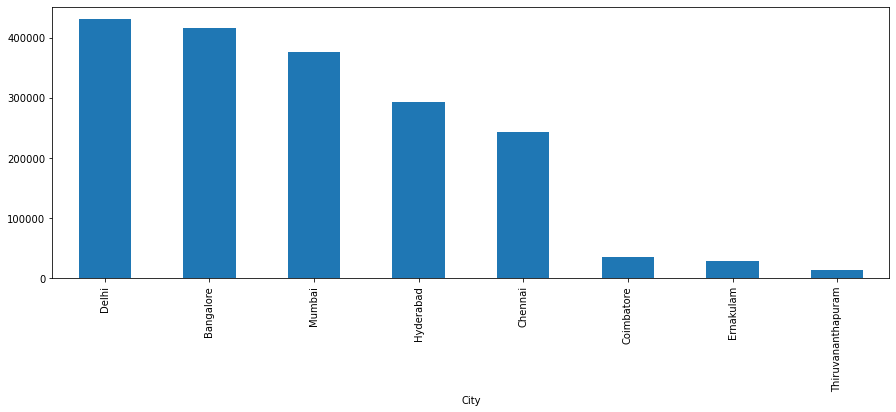

In [413]:
fee_train.groupby("City")["Fees"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

Doctors in Delhi are getting more fee and those in Thiruvananthapuram get least

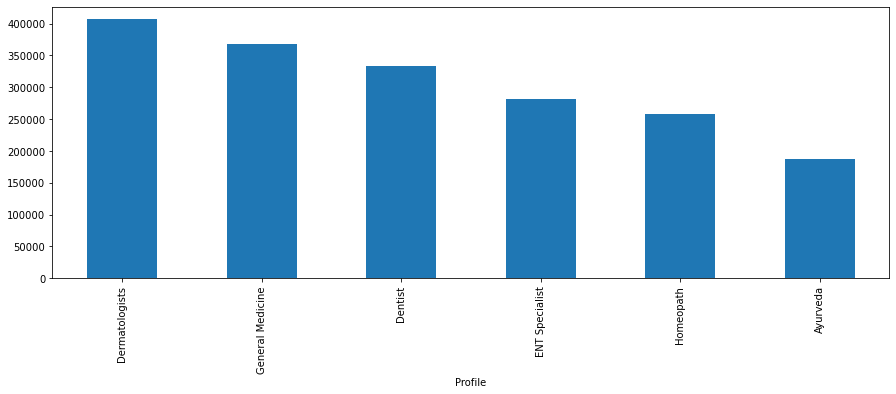

In [414]:
fee_train.groupby("Profile")["Fees"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

Dermatologists are most costly while ayurveda is the cheapest

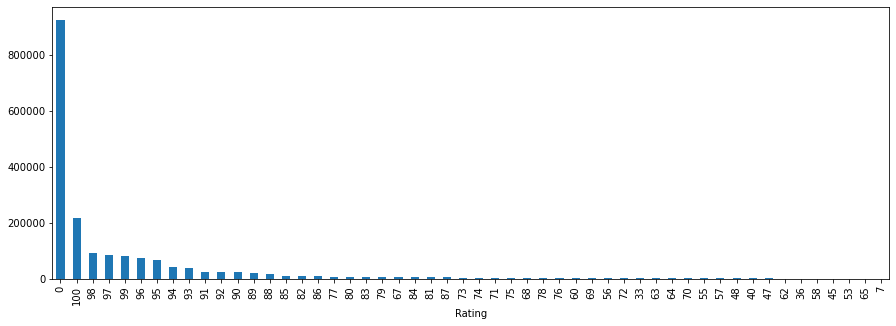

In [415]:
fee_train.groupby("Rating")["Fees"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

Doctors without rating are getting more fee. we replaced unavailable ratings with 0. Not sure if we need to do anything else there

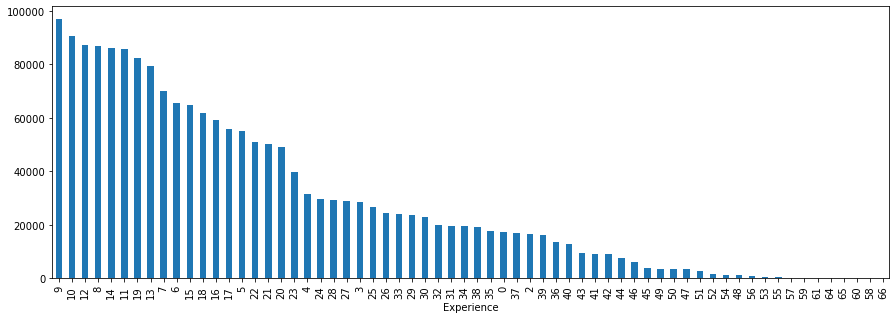

In [416]:
fee_train.groupby("Experience")["Fees"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

Relationship between experience and fee is also doesn't seem to be linear

We can encode text columns into numbers

In [417]:
l = LabelEncoder()
fee_train['Qualification'] = l.fit_transform(fee_train['Qualification'])
fee_train

,Qualification,Experience,Rating,City,Profile,Fees
0,401,24,100,Ernakulam,Homeopath,100
1,73,12,98,Bangalore,Ayurveda,350
2,1135,9,0,Bangalore,ENT Specialist,300
3,464,12,0,Bangalore,Ayurveda,250
4,10,20,100,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,1075,19,98,Bangalore,ENT Specialist,300
5957,596,33,0,Chennai,General Medicine,100
5958,596,41,97,Delhi,General Medicine,600
5959,943,15,90,Mumbai,General Medicine,100


In [418]:
l = LabelEncoder()
fee_train['City'] = l.fit_transform(fee_train['City'])
fee_train

,Qualification,Experience,Rating,City,Profile,Fees
0,401,24,100,4,Homeopath,100
1,73,12,98,0,Ayurveda,350
2,1135,9,0,0,ENT Specialist,300
3,464,12,0,0,Ayurveda,250
4,10,20,100,1,Ayurveda,250
...,...,...,...,...,...,...
5956,1075,19,98,0,ENT Specialist,300
5957,596,33,0,1,General Medicine,100
5958,596,41,97,3,General Medicine,600
5959,943,15,90,6,General Medicine,100


In [419]:
fee_train['Profile'] = l.fit_transform(fee_train['Profile'])
fee_train

,Qualification,Experience,Rating,City,Profile,Fees
0,401,24,100,4,5,100
1,73,12,98,0,0,350
2,1135,9,0,0,3,300
3,464,12,0,0,0,250
4,10,20,100,1,0,250
...,...,...,...,...,...,...
5956,1075,19,98,0,3,300
5957,596,33,0,1,4,100
5958,596,41,97,3,4,600
5959,943,15,90,6,4,100


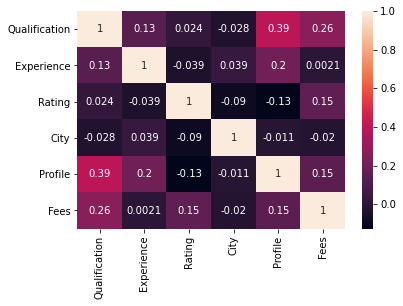

In [420]:
sns.heatmap(fee_train.corr(), annot = True)

As we can see from the above diagram, strangely Experience has very less correlation with Fee. QUalification and profile has more correlation

In [421]:
from sklearn.preprocessing import StandardScaler

In [422]:
Y = fee_train["Fees"]
X = fee_train.drop('Fees', axis = 1)

In [423]:
Y = Y.values.reshape(-1,1)
Y.shape

(5961, 1)

In [424]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4
0,-0.473306,0.600979,1.220669,0.415629,1.543016
1,-1.265944,-0.476040,1.178419,-1.324538,-1.472893
2,1.300465,-0.745295,-0.891845,-1.324538,0.336652
3,-0.321061,-0.476040,-0.891845,-1.324538,-1.472893
4,-1.418189,0.241972,1.220669,-0.889497,-1.472893
...,...,...,...,...,...
5956,1.155470,0.152221,1.178419,-1.324538,0.336652
5957,-0.002072,1.408743,-0.891845,-0.889497,0.939834
5958,-0.002072,2.126756,1.157293,-0.019413,0.939834
5959,0.836481,-0.206786,1.009417,1.285712,0.939834


In [425]:
from sklearn.model_selection import train_test_split

In [426]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 90)
print(Y_train.shape, Y_test.shape)

(4768, 1) (1193, 1)


In [427]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# LinearRegression

In [428]:
lnr = LinearRegression()
lnr.fit(X_train, Y_train)

LinearRegression()

In [429]:
lnr_pred = lnr.predict(X_test)
lnr_pred

array([[371.37761652],
       [331.1482797 ],
       [217.72297455],
       ...,
       [367.39275833],
       [348.58354829],
       [344.22069344]])

In [430]:
lnr_accuracy = round(lnr.score(X_train, Y_train)*100)
lnr_accuracy

10.0

In [431]:
print('Mean absolute error:', mean_absolute_error(Y_test, lnr_pred))
print('Mean squared error:', mean_squared_error(Y_test, lnr_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, lnr_pred)))
print('R2 score is:', r2_score(Y_test, lnr_pred))

Mean absolute error: 146.64147781230903
Mean squared error: 32781.790669213224
Root Mean squared error: 181.05742367882414
R2 score is: 0.10252724895074761


# DecisionTree

In [432]:
tree = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)
tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)
tree_pred

array([360.73825503, 391.45299145, 165.58080808, ..., 443.33333333,
       424.64788732, 378.31858407])

In [433]:
tree_accuracy = round(tree.score(X_train, Y_train)*100)
tree_accuracy

18.0

In [434]:
print('Mean absolute error:', mean_absolute_error(Y_test, tree_pred))
print('Mean squared error:', mean_squared_error(Y_test, tree_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, tree_pred)))
print('R2 score is:', r2_score(Y_test, tree_pred))

Mean absolute error: 138.843088873787
Mean squared error: 30657.34958764224
Root Mean squared error: 175.09240299808053
R2 score is: 0.1606884397520224


# RandomForestRegressor

In [435]:
rf = RandomForestRegressor(n_estimators = 400, max_depth = 6, min_samples_leaf = 100, n_jobs = 4)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([414.41005969, 357.16488561, 186.16782265, ..., 400.68914905,
       417.41138317, 335.09111176])

In [436]:
rf_accuracy = round(rf.score(X_train, Y_train)*100)
rf_accuracy

18.0

In [437]:
print('Mean absolute error:', mean_absolute_error(Y_test, rf_pred))
print('Mean squared error:', mean_squared_error(Y_test, rf_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, rf_pred)))
print('R2 score is:', r2_score(Y_test, rf_pred))

Mean absolute error: 137.74844755979427
Mean squared error: 29798.01447970277
Root Mean squared error: 172.62101401539377
R2 score is: 0.1842146055791971


# XGBoost Regressor

In [438]:
xg = XGBRegressor(n_estimators = 1000, learning_rate = 0.3)
xg.fit(X_train, Y_train)
xg_pred = xg.predict(X_test)
xg_pred

array([557.5599 , 382.22427, 204.47548, ..., 500.55786, 424.24463,
       444.51965], dtype=float32)

In [439]:
xg_accuracy = round(xg.score(X_train, Y_train)*100)
xg_accuracy

91.0

In [440]:
print('Mean absolute error:', mean_absolute_error(Y_test, xg_pred))
print('Mean squared error:', mean_squared_error(Y_test, xg_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, xg_pred)))
print('R2 score is:', r2_score(Y_test, xg_pred))

Mean absolute error: 151.6046719087439
Mean squared error: 40876.183570564346
Root Mean squared error: 202.1785932549842
R2 score is: -0.1190743450119498


XGBoost Regressor performs much better than other models

In [441]:
import pickle
filename = 'fee_xg.pkl'
pickle.dump(xg, open(filename, 'wb'))

In [442]:
fee_test = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/Doctor_fee_consultation/Final_Test.csv")
fee_test

,Qualification,Experience,Rating,Location,City,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,Ghatkopar East,Mumbai,General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,West Marredpally,Hyderabad,ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,KK Nagar,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,New Ashok Nagar,Delhi,Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,Kanakpura Road,Bangalore,Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,Basavanagudi,Bangalore,Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,Choolai,Chennai,Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,Porur,Chennai,General Medicine,NaN
1985,BDS,12 years experience,98%,Arekere,Bangalore,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [443]:
fee_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Location            1981 non-null   object
 4   City                1981 non-null   object
 5   Profile             1987 non-null   object
 6   Miscellaneous_Info  1153 non-null   object
dtypes: object(7)
memory usage: 108.8+ KB


In [444]:
fee_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Location                 6
City                     6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [445]:
fee_test['City'] = fee_test['City'].str.strip()

In [446]:
fee_test['Rating'].fillna('0%',inplace = True)
fee_test['Rating'] = fee_test['Rating'].str.slice(stop=-1).astype(int)

In [447]:
fee_test.drop('Miscellaneous_Info', axis = 1, inplace = True)
fee_test

,Qualification,Experience,Rating,Location,City,Profile
0,MBBS,35 years experience,0,Ghatkopar East,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,0,West Marredpally,Hyderabad,ENT Specialist
2,"MBBS, DDVL",40 years experience,70,KK Nagar,Chennai,Dermatologists
3,BAMS,0 years experience,0,New Ashok Nagar,Delhi,Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100,Kanakpura Road,Bangalore,Dentist
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,0,Basavanagudi,Bangalore,Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,0,Choolai,Chennai,Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,0,Porur,Chennai,General Medicine
1985,BDS,12 years experience,98,Arekere,Bangalore,Dentist


In [448]:
fee_test.drop('Location', axis = 1, inplace = True)
fee_test

,Qualification,Experience,Rating,City,Profile
0,MBBS,35 years experience,0,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,0,Hyderabad,ENT Specialist
2,"MBBS, DDVL",40 years experience,70,Chennai,Dermatologists
3,BAMS,0 years experience,0,Delhi,Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100,Bangalore,Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,0,Bangalore,Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,0,Chennai,Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,0,Chennai,General Medicine
1985,BDS,12 years experience,98,Bangalore,Dentist


In [449]:
fee_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
City             6
Profile          0
dtype: int64

In [450]:
fee_test['City'].mode()

0    Bangalore
dtype: object

In [451]:
fee_test['City'].fillna('Bangalore', inplace = True)

In [452]:
fee_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
City             0
Profile          0
dtype: int64

In [453]:
fee_test['Experience'] = fee_test['Experience'].str.slice(stop=2).astype(int)
fee_test

,Qualification,Experience,Rating,City,Profile
0,MBBS,35,0,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0,Hyderabad,ENT Specialist
2,"MBBS, DDVL",40,70,Chennai,Dermatologists
3,BAMS,0,0,Delhi,Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Bangalore,Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,0,Bangalore,Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0,Chennai,Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0,Chennai,General Medicine
1985,BDS,12,98,Bangalore,Dentist


In [454]:
l = LabelEncoder()
fee_test['Qualification'] = l.fit_transform(fee_test['Qualification'])
fee_test

,Qualification,Experience,Rating,City,Profile
0,241,35,0,Mumbai,General Medicine
1,340,31,0,Hyderabad,ENT Specialist
2,258,40,70,Chennai,Dermatologists
3,6,0,0,Delhi,Ayurveda
4,79,16,100,Bangalore,Dentist
...,...,...,...,...,...
1982,17,10,0,Bangalore,Ayurveda
1983,548,4,0,Chennai,Dermatologists
1984,474,9,0,Chennai,General Medicine
1985,51,12,98,Bangalore,Dentist


In [455]:
l = LabelEncoder()
fee_test['City'] = l.fit_transform(fee_test['City'])
fee_test

,Qualification,Experience,Rating,City,Profile
0,241,35,0,6,General Medicine
1,340,31,0,5,ENT Specialist
2,258,40,70,1,Dermatologists
3,6,0,0,3,Ayurveda
4,79,16,100,0,Dentist
...,...,...,...,...,...
1982,17,10,0,0,Ayurveda
1983,548,4,0,1,Dermatologists
1984,474,9,0,1,General Medicine
1985,51,12,98,0,Dentist


In [459]:
l = LabelEncoder()
fee_test['Profile'] = l.fit_transform(fee_test['Profile'])
fee_test

,Qualification,Experience,Rating,City,Profile
0,241,35,0,6,4
1,340,31,0,5,3
2,258,40,70,1,2
3,6,0,0,3,0
4,79,16,100,0,1
...,...,...,...,...,...
1982,17,10,0,0,0
1983,548,4,0,1,2
1984,474,9,0,1,4
1985,51,12,98,0,1


In [460]:
X

,Qualification,Experience,Rating,City,Profile
0,241,35,0,6,4
1,340,31,0,5,3
2,258,40,70,1,2
3,6,0,0,3,0
4,79,16,100,0,1
...,...,...,...,...,...
1982,17,10,0,0,0
1983,548,4,0,1,2
1984,474,9,0,1,4
1985,51,12,98,0,1


In [461]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4
0,-0.102089,1.506992,-0.901887,1.317801,0.901673
1,0.430414,1.155001,-0.901887,0.876535,0.297007
2,-0.010649,1.946982,0.578901,-0.888528,-0.307658
3,-1.366112,-1.572935,-0.901887,-0.005996,-1.516990
4,-0.973458,-0.164968,1.213525,-1.329793,-0.912324
...,...,...,...,...,...
1982,-1.306945,-0.692956,-0.901887,-1.329793,-1.516990
1983,1.549208,-1.220944,-0.901887,-0.888528,-0.307658
1984,1.151176,-0.780954,-0.901887,-0.888528,0.901673
1985,-1.124065,-0.516960,1.171216,-1.329793,-0.912324


In [462]:
xg_pred = xg.predict(X)
xg_pred

array([393.16812 , 217.76706 , 358.0828  , ..., 230.27382 , 373.56552 ,
        55.922115], dtype=float32)

In [463]:
fee_out = pd.DataFrame(data = xg_pred, columns = ['Fees'])
fee_out

,Fees
0,393.168121
1,217.767059
2,358.082794
3,62.018322
4,65.846901
...,...
1982,194.911041
1983,151.093185
1984,230.273819
1985,373.565521
